# API Reference

Import everything from the imports notebook. This reads in all of the expression data as well as the functions needed to analyse differential expression data.

In [1]:
import NotebookImport
from Imports import *

/cellar/users/agross/anaconda2/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


importing IPython notebook from Imports

__matched_tn__ is our matched expression data.

In [2]:
def pull_out_tn(df, assoication_cutoff=.001):
    """
    Does a reconstruction of the data with on only eigenvectors
    associated with the tumor-normal axis.

    This is done by calculating the signular-value-decomposition
    of the matrix, searching for associations of each eigenvector
    with the tumor-normal change, and finally reconstructing the
    matrix with those not significantly associated zero-ed out.

    Returns a DataFrame of the reconstructed data matrix.

    df:
        DataFrame of measurements.  Should have a multi-index with
        subjects on the first level and tissue type ('01' or '11')
        on the second level.
    """
    df = pd.concat([df.xs('01',1,1), df.xs('11',1,1)],
                    keys=['01','11'], axis=1)
    df.columns = df.columns.swaplevel(0,1)

    svd = frame_svd(df)
    keep = svd[2].apply(ttest_rel).T.p < assoication_cutoff
    S = pd.Series(svd[1]) * 1.*keep
    S = pd.DataFrame(sp.linalg.diagsvd(S, len(S), len(S)), index=S.index,
                     columns=S.index)
    df_new = svd[0].dot(S).dot(svd[2].T)
    return df_new

In [3]:
df = pull_out_tn(matched_tn)

In [4]:
df.T.head(10).T.head()

,TCGA-22-4593,TCGA-22-4609,TCGA-22-5471,TCGA-22-5472,TCGA-22-5478,TCGA-22-5481,TCGA-22-5482,TCGA-22-5483,TCGA-22-5489,TCGA-22-5491
,01,01,01,01,01,01,01,01,01,01
A1BG,0.84,1.61,1.72,2.50,2.25,2.40,0.75,1.88,1.83,1.96
A1CF,-6.43,-8.49,-6.71,-8.69,-7.07,-4.14,-6.96,-4.99,-7.01,-7.39
A2LD1,1.83,1.65,1.48,1.94,1.83,1.45,1.75,1.92,1.43,1.61
A2M,7.11,8.18,6.56,8.28,8.14,7.38,6.21,7.38,8.25,6.14
A2ML1,3.60,3.90,4.60,3.34,2.14,-1.19,5.86,0.54,2.09,6.47


In [6]:
matched_tn.T.head(10).T.head()

TCGA-22-4593         TCGA-22-4609         TCGA-22-5471         TCGA-22-5472         TCGA-22-5478       
                 01     11            01     11            01     11            01     11            01     11
A1BG           2.82   1.73          2.12   2.24          2.21   1.59          1.07   1.29          4.04   1.55
A1CF          -5.12  -6.32         -6.12  -6.14         -4.81  -5.14         -6.64  -6.25         -4.88  -6.23
A2LD1          0.87   2.04          2.05   1.65          3.00   1.35          1.64   1.67          1.31   1.53
A2M            8.01  11.63          9.77  11.53          6.40  11.09          9.99  12.37          8.38  11.24
A2ML1          2.41  -5.16          7.65  -2.54          7.82  -3.11          6.20  -2.02          1.35  -3.34

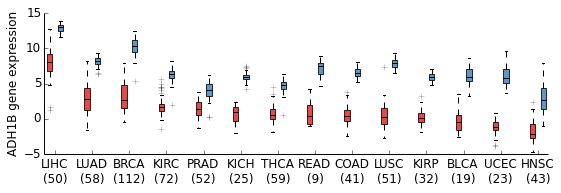

In [7]:
paired_bp_tn_split(df.ix['ADH1B'], codes)

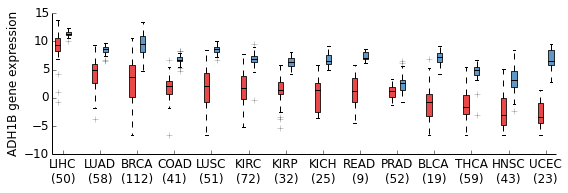

In [5]:
paired_bp_tn_split(matched_tn.ix['ADH1B'], codes)

###Run a simple screen for DX genes 
* Here we take the matched expression data and fun a basic screen
* fc = 1 means that we have no foldchange buffer for a gene to be considered over or underexpressed in a patient

In [8]:
tab = binomial_test_screen(matched_tn, fc=1.)

In [9]:
tab2 = binomial_test_screen(df, fc=1.)

A peek at the most frequently differentially expressed genes.

In [24]:
tab2.sort('p').head(20)

,num_ox,num_dx,frac,p
IBSP,647,649,1.00,1.81e-190
ADH1B,3,649,0.00,3.90e-188
ADAMTS14,646,649,1.00,3.90e-188
SEMA5B,645,649,0.99,6.31e-186
NXPH4,645,649,0.99,6.31e-186
CDH19,4,649,0.01,6.31e-186
KISS1R,645,649,0.99,6.31e-186
ADH1A,5,649,0.01,8.15e-184
CAMK2N2,644,649,0.99,8.15e-184
RNASE10,644,649,0.99,8.15e-184


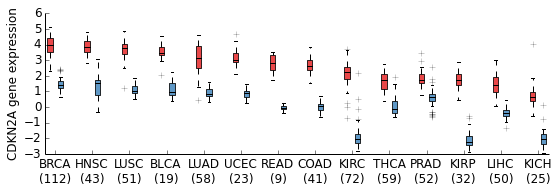

In [27]:
paired_bp_tn_split(df.ix['CDKN2A'], codes)

In [15]:
dx_rna = tab2
gs2 = gene_sets

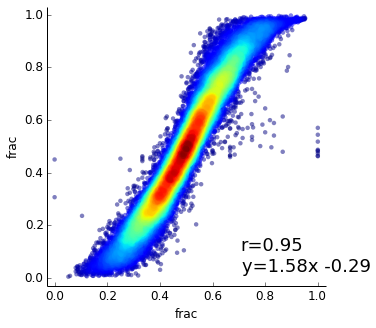

In [18]:
plot_regression(tab.frac, tab2.frac, density=True, rad=.03, s=20,
                rasterized=True, line_args={'lw': 0})

In [10]:
tab.sort('p').head(10)

,num_ox,num_dx,frac,p
PKMYT1,618,649,0.95,8.00e-143
IQGAP3,617,649,0.95,1.55e-141
UBE2C,617,649,0.95,1.55e-141
ASF1B,616,649,0.95,2.90e-140
CDT1,615,649,0.95,5.26e-139
SEMA5B,615,649,0.95,5.26e-139
MELK,615,649,0.95,5.26e-139
ADH1B,34,649,0.05,5.26e-139
TPX2,613,649,0.94,1.58e-136
SPC24,613,649,0.94,1.58e-136


Distribution of genes' likelyhood to be overexpressed.

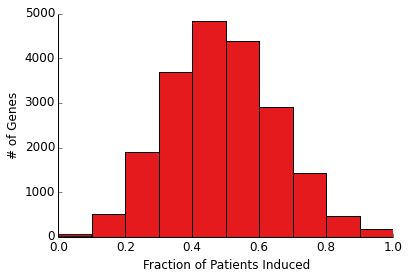

In [6]:
fig, ax = subplots(figsize=(6,4))
tab.frac.hist(ax=ax)
ax.set_xlabel('Fraction of Patients Induced')
ax.set_ylabel('# of Genes')
prettify_ax(ax)

### Infer missing values for normal tissue expression

In [ ]:
def infer_normal_knn(df, r_curtoff=.4, k=5):
    """
    Preform imputation to predict normal expression levels.

    r_curtoff:
        Correlation cutoff to use for isolating genes to use for nearest
        neighbor calclulation.  The idea here is that we want to use those
        genes that are not differentially expressed between tumor and nornal
        tissue to find patients that are similar.  The goal of this operation
        is for the KNN to find patients that are similar in their normal
        tissue expression profiles rather than patients with similar tumor
        profiles.  The normal tissue can be influenced by a number of factors
        including specific tissue location, age and gender of patient, general
        health of patient, ect.
    k:
        K-nearest-neighbor parameter
    """
    df = df.dropna(axis=[0, 1])
    tumor = df.xs('01', 1, 1)
    normal = df.xs('11', 1, 1)
    tn_corr = tumor.corrwith(normal, axis=1).dropna()
    tumor_corr = tumor.ix[true_index(tn_corr > r_curtoff)].corr()

    pts = tumor_corr.index.intersection(normal.columns)
    nn = pd.Series({i: list(v.ix[pts].order().index[-1 * k:]) for i, v
                    in tumor_corr.iteritems()})
    nn = nn[nn.map(len) > 1]
    norm_inf = pd.DataFrame({i: normal.ix[:, n].mean(1) for i, n in
                             nn.iteritems()})
    tn_c = pd.concat([norm_inf, tumor.ix[:, norm_inf.columns]],
                     keys=['11', '01'], axis=1)
    tn_c.columns = tn_c.columns.swaplevel(0, 1)
    tn_c = tn_c.sortlevel(axis=1, level=0)
    return tn_c

In [7]:
cancers = codes.ix[matched_tn.columns.get_level_values(0)].unique()

In [8]:
cancer = 'HNSC'
df = matched_tn.ix[:, ti(codes==cancer)]
tab1 = binomial_test_screen(df, fc=1.)

Infer data and remove patients for which data was not inferred.

In [9]:
df_inf = infer_normal_knn(rna_df.ix[:, ti(codes == 'HNSC')], r_curtoff=.3, k=5)
df_inf = df_inf.ix[:, df_inf.columns.diff(df.columns)]

Repeat the DX screen with the inferred data.

In [10]:
tab = binomial_test_screen(df_inf, fc=1.)
pearson_pandas(tab.frac, tab1.frac)

rho    0.87
p      0.00
dtype: float64

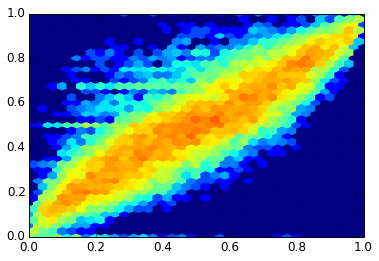

In [11]:
plt.hexbin(*match_series(tab.frac, tab1.frac), bins='log', gridsize=35);